<a href="https://colab.research.google.com/github/christopherorea/Analizando_a_Metacritic/blob/main/Metacritic_Videogames.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de Prensa de Videojuegos

Autor: Christopher Orea. Admin de TheHappyCookieHour
El motivo del presente notebook es análizar a la prensa de videojuegos y abarcar la tan llamada guerra de consolas. 

Se intentará evaluar si existe o no preferencia hacia alguna compañía en especial. Por lo útilizaremos análisis de datos, prueba de hipotesís y un poco de ciencia de datos para entender que sucedió entre 2011 y 2019 con respecto a la forma de evaluar los videojuegos de esa época.

In [115]:
import matplotlib.pyplot as plt # Librería para graficar
import pandas as pd #Librería para manipular datos para filtrar
%matplotlib inline #Muestra la gráfica dentro del notebook

UsageError: unrecognized arguments: #Muestra la gráfica dentro del notebook


Se utilizó el dataset de Metacritic Games de Kaggle. Puedes encontrarlo en la siguiente liga para cargarlo y hacer la prueba de este notebook.

https://www.kaggle.com/skateddu/metacritic-games-stats-20112019

In [116]:
data = pd.read_csv('./metacritic_games.csv')

In [117]:
data.columns #exploración de datos

Index(['game', 'platform', 'developer', 'genre', 'number_players', 'rating',
       'release_date', 'positive_critics', 'neutral_critics',
       'negative_critics', 'positive_users', 'neutral_users', 'negative_users',
       'metascore', 'user_score'],
      dtype='object')

## Número de jugadores por compañías

Estamos intentando explorar los datos y probar la creencia de que solo en Xbox se tienen más juegos para jugar entre más jugadores que Play Station.

Por lo que evaluaremos un Ratio entre total de juegos y cantidad de juegos que puedes jugar a:

*   Múltijugador local
*   Múltijugador en linea
*   Jugar a un solo jugador.




In [118]:
microsoft_games = data[data['platform'] == 'XONE']['number_players'].value_counts()

In [119]:
play_games = data[data['platform'] == 'PS4']['number_players'].value_counts()

In [120]:
total_xbox = microsoft_games.sum()

In [121]:
total_play = play_games.sum()

Intanteremos tomar en cuenta el total de juegos para saber que tanto de su catálogo esta destinado a los juegos multijugador o un jugador.

In [122]:
xbox = pd.DataFrame(microsoft_games/total_xbox)
xbox.head(5)

,number_players
No Online Multiplayer,0.459375
Up to 4,0.106250
Up to 8,0.071875
2,0.071875
Up to 6,0.046875


In [123]:
play = pd.DataFrame(play_games/total_play)
play.head(5)

,number_players
No Online Multiplayer,0.465371
Up to 4,0.126367
2,0.098420
Up to 8,0.081409
Up to 6,0.042527


In [124]:
unidos = xbox.join(play, lsuffix='number_players')
unidos.columns = ['xbox','play']

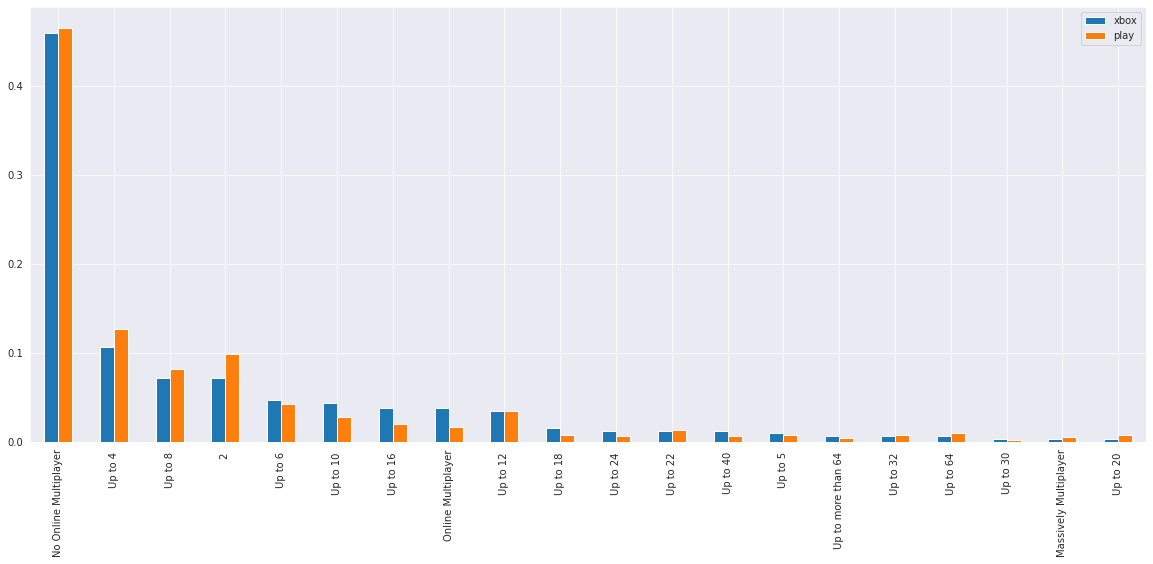

In [125]:
unidos.plot(kind='bar', figsize=[20,8])

Parece ser que en la mayoría de los juegos que van de 1 hasta 8 jugadores, playstation nutre un catálogo que se enfoca exclusivamente a esto, en mayor medida que Xbox.

Mientras que Xbox nutre su catalogo de juegos de 6 hasta 16 en mayor medida que Playstation.

## Conociendo Nuestros datos

### Cantidad de juegos por compañía

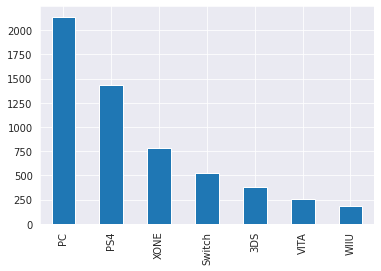

In [126]:
data['platform'].value_counts().plot(kind='bar')

### Cantidad de juegos por Género

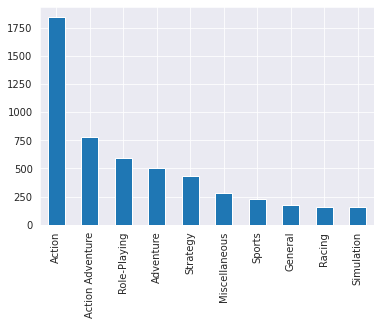

In [127]:
data['genre'].value_counts().head(10).plot(kind='bar')

## Juegos compartidos puntuados por prensa.

### Juegos que salieron en al menos 3 compañías: Switch,PS4,XONE
¿Se podrá observar que plataforma es la que más titulos tiene en su catalogo mejor puntuados graficando?

In [128]:
game_platform = data[data['platform'].apply(lambda x: True if x in ['Switch','PS4','XONE'] else False)]
multi_plat_game = game_platform['game'].value_counts()[game_platform['game'].value_counts() > 2].index
multi_plat_game
game_platform = game_platform[game_platform['game'].apply(lambda x: x in multi_plat_game)]
game_platform = game_platform[['game','platform','metascore']]
game_platform = game_platform.groupby(['game','platform']).first()
game_platform = game_platform.sort_values(by=['game'],ascending=False)
game_platform = game_platform.reset_index()

In [129]:
game_platform

,game,platform,metascore
0,Yooka-Laylee,XONE,73
1,Yooka-Laylee,Switch,75
2,Yooka-Laylee,PS4,68
3,Yoku's Island Express,XONE,83
4,Yoku's Island Express,Switch,82
...,...,...,...
313,BUTCHER,PS4,71
314,BUTCHER,XONE,72
315,Attack on Titan 2,XONE,74
316,Attack on Titan 2,Switch,72


In [130]:
import seaborn as sns # librería de grafícación

In [131]:
palette = {'XONE': 'GREEN','PS4':'BLUE', 'Switch': 'RED'} #diccionario de colores para graficar.

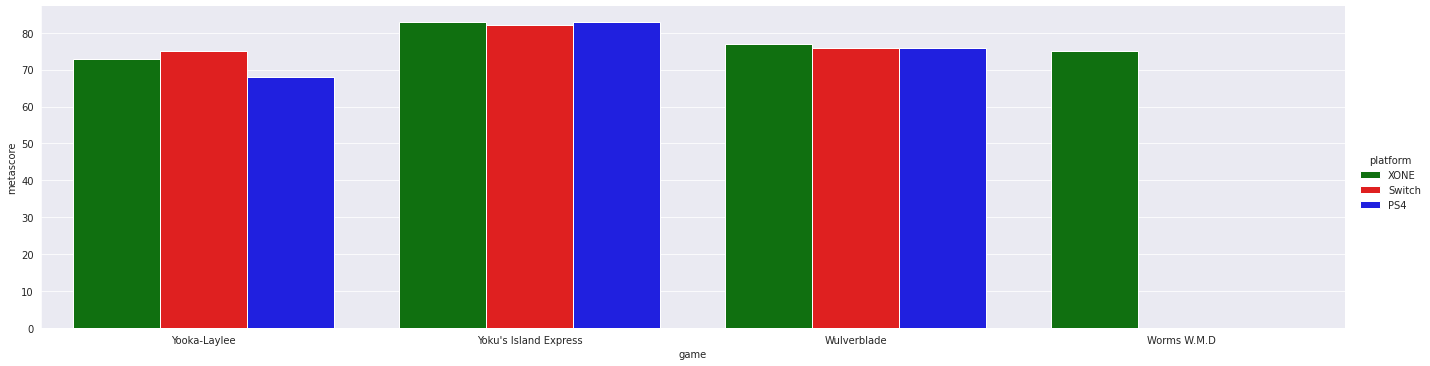

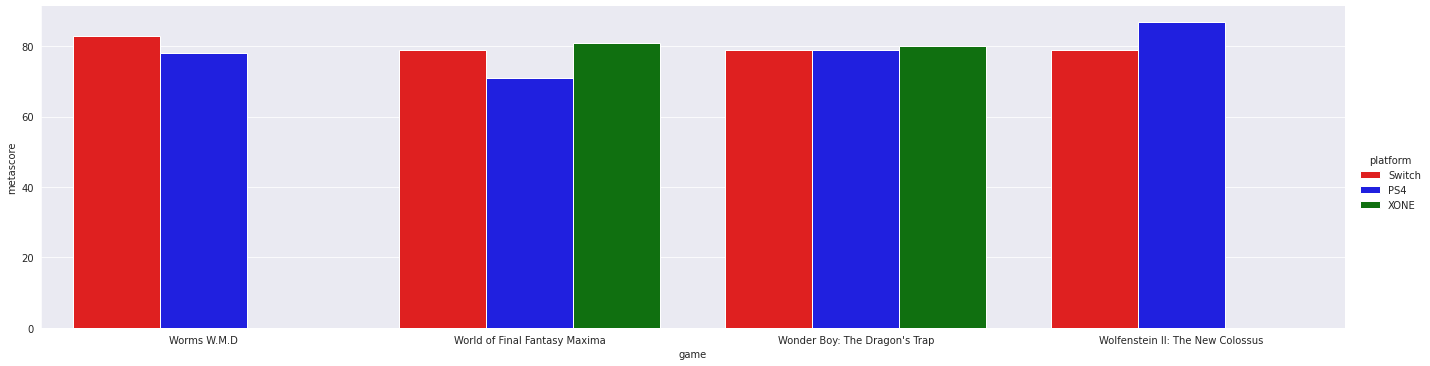

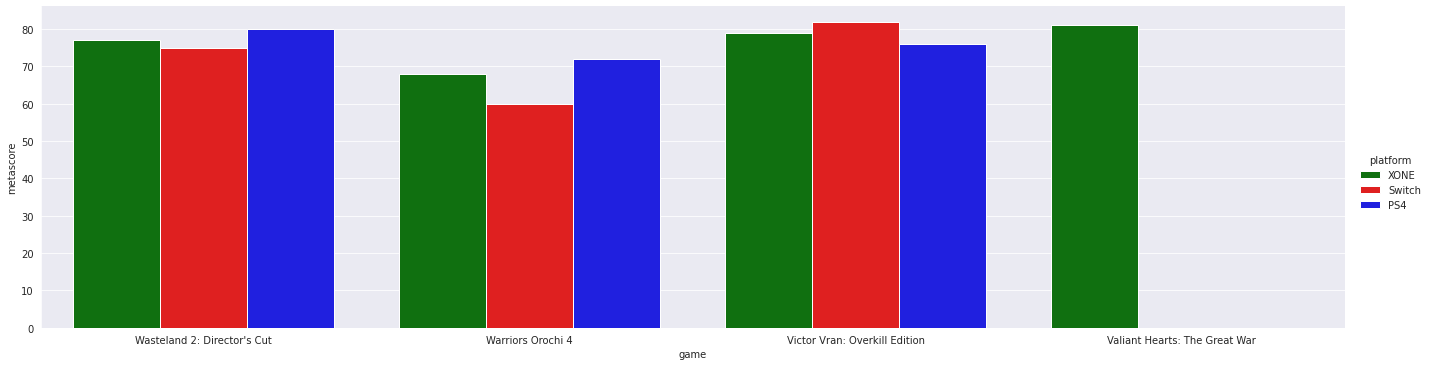

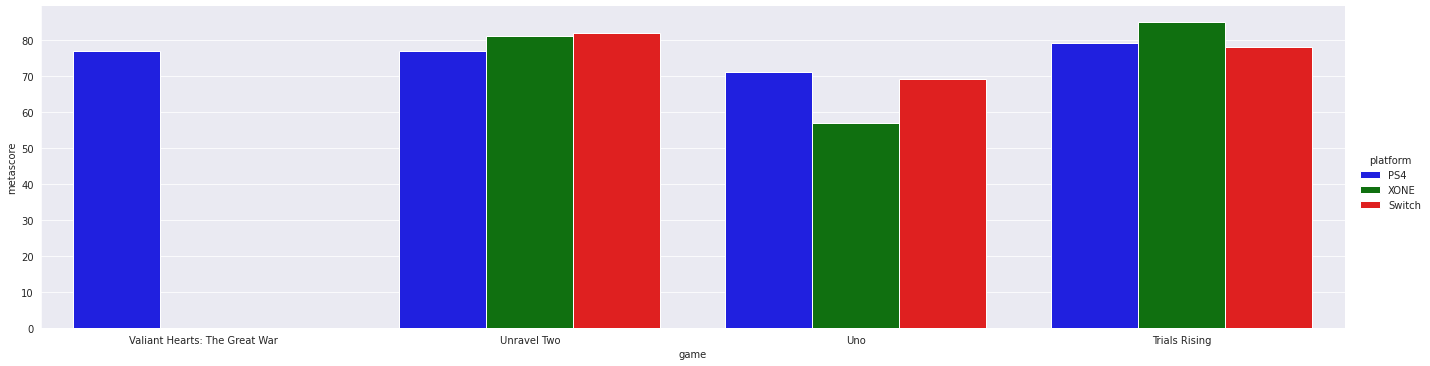

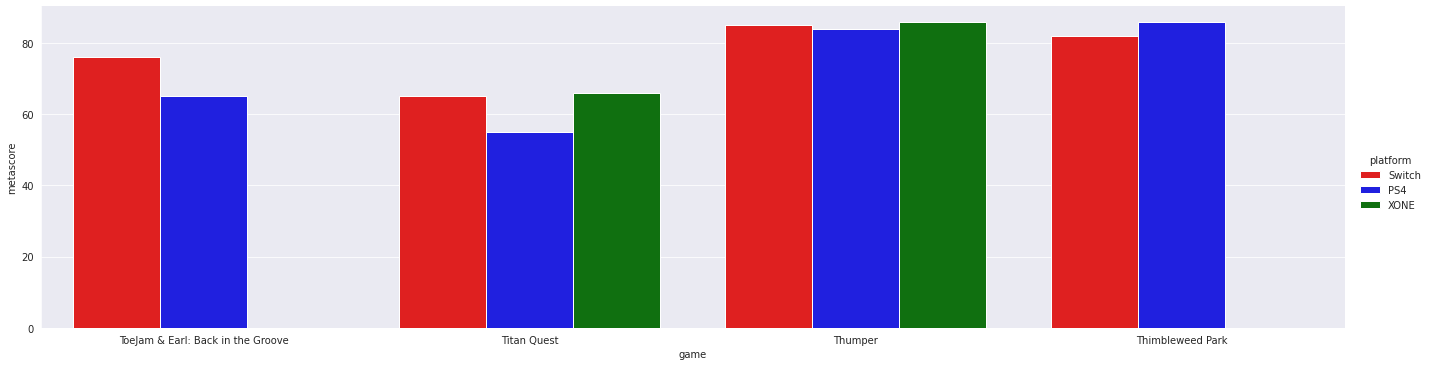

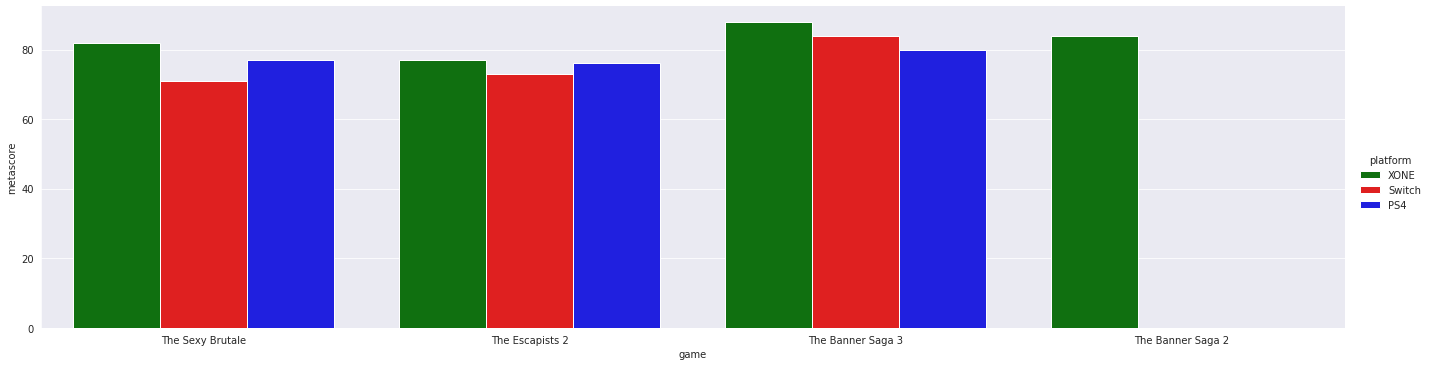

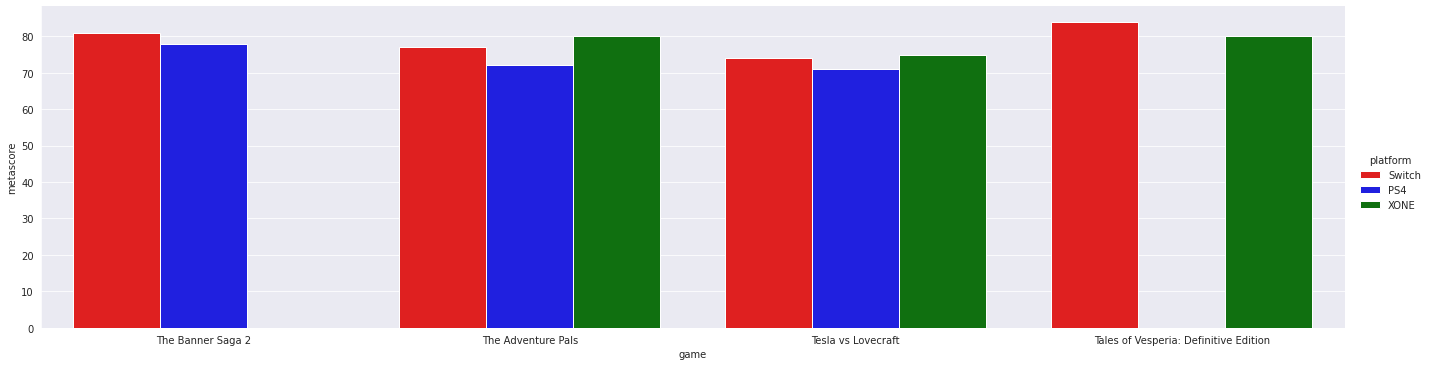

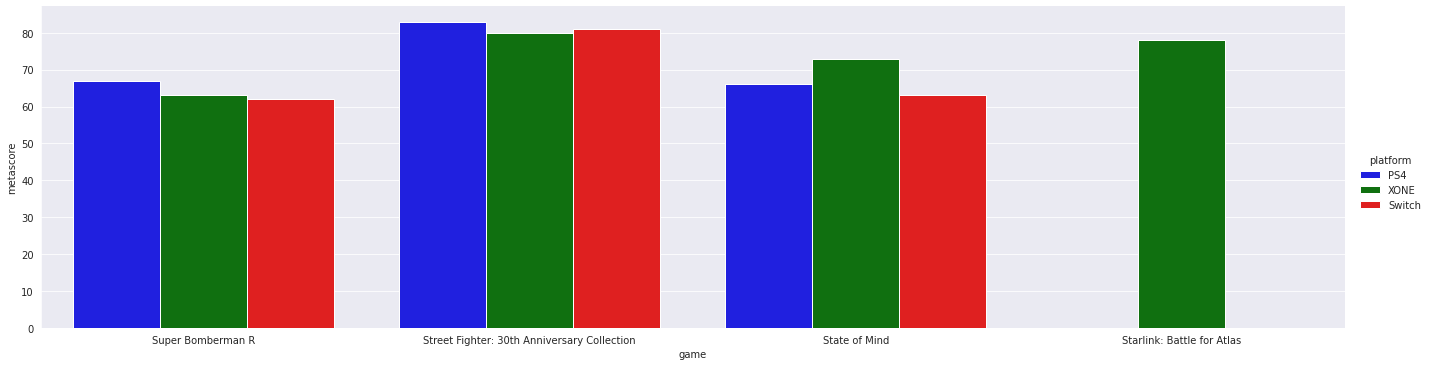

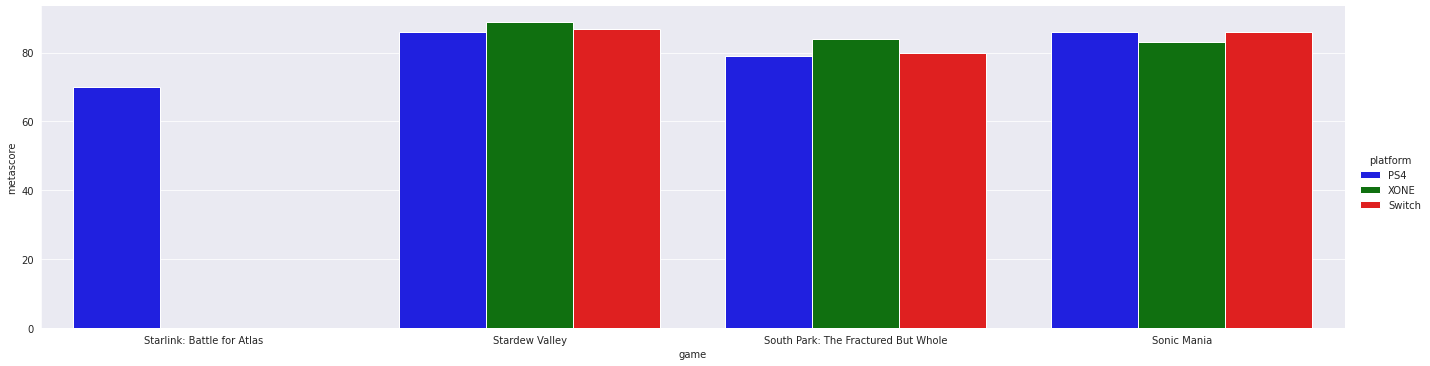

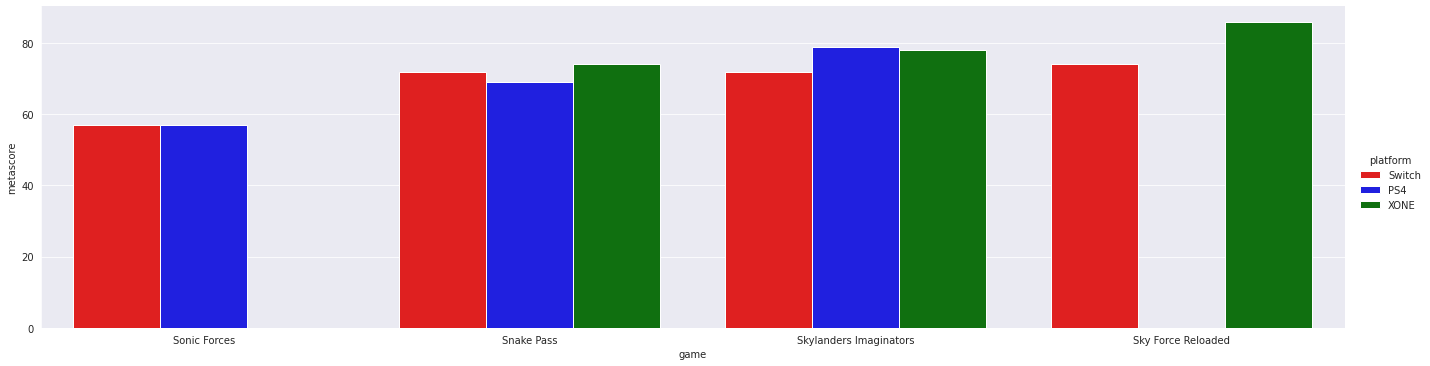

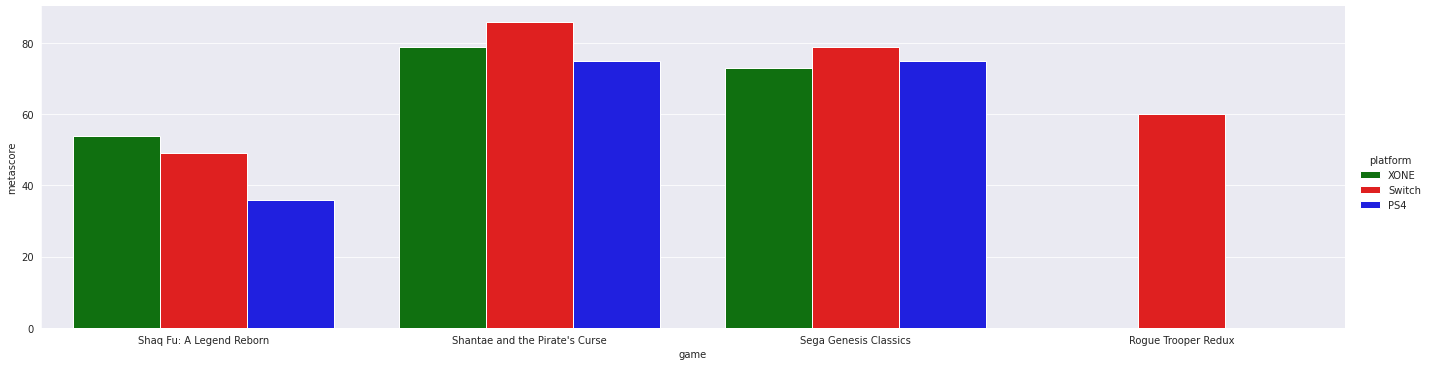

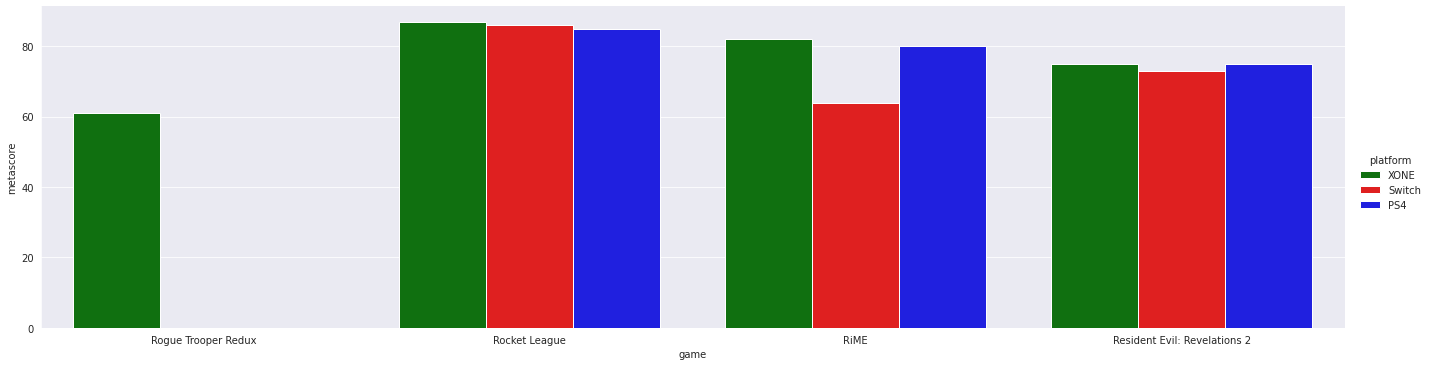

In [133]:
import numpy as np #librería para crear vectores

for i in np.linspace(0,119,12):
  sns.catplot(data=game_platform[int(i):int(i)+10], x='game',y='metascore', hue='platform', kind='bar', aspect=30/8, palette=palette)

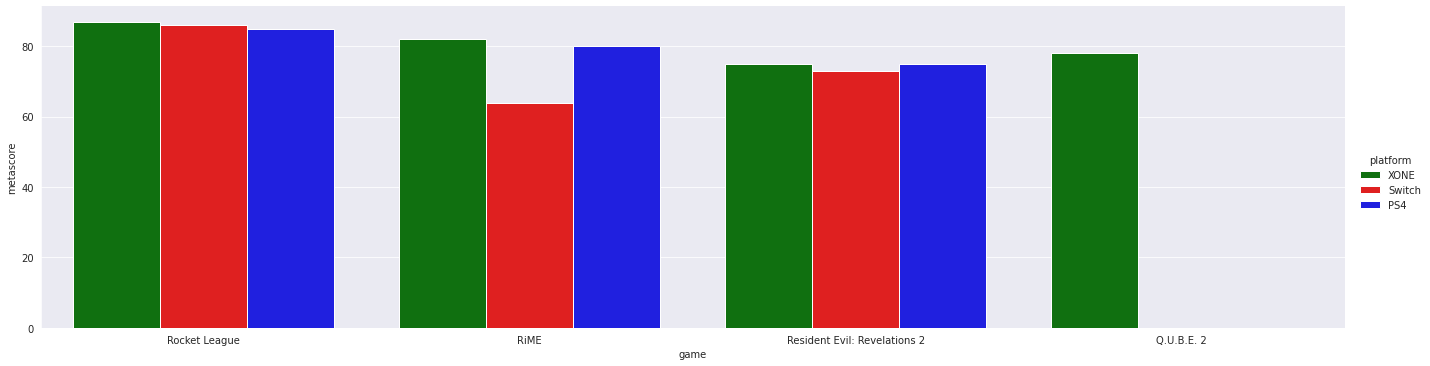

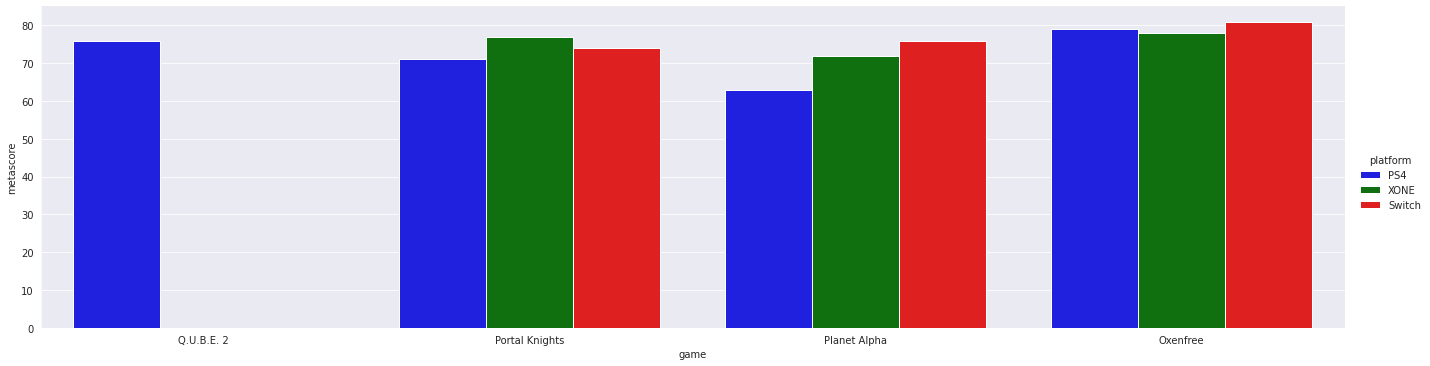

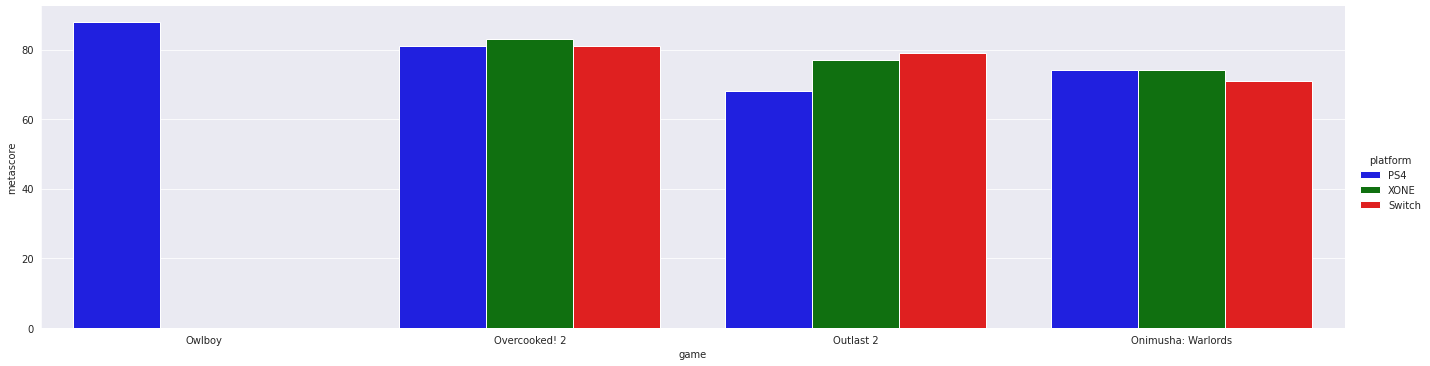

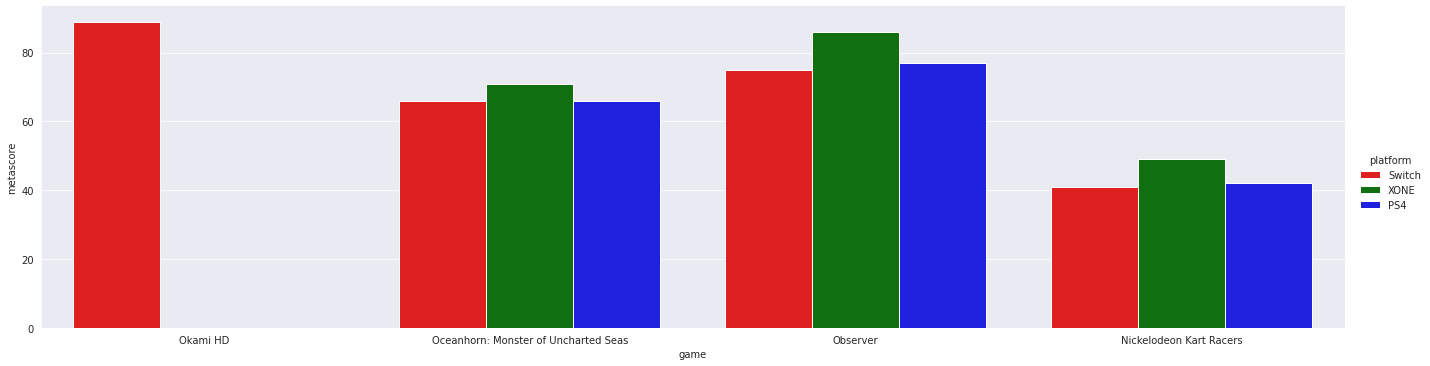

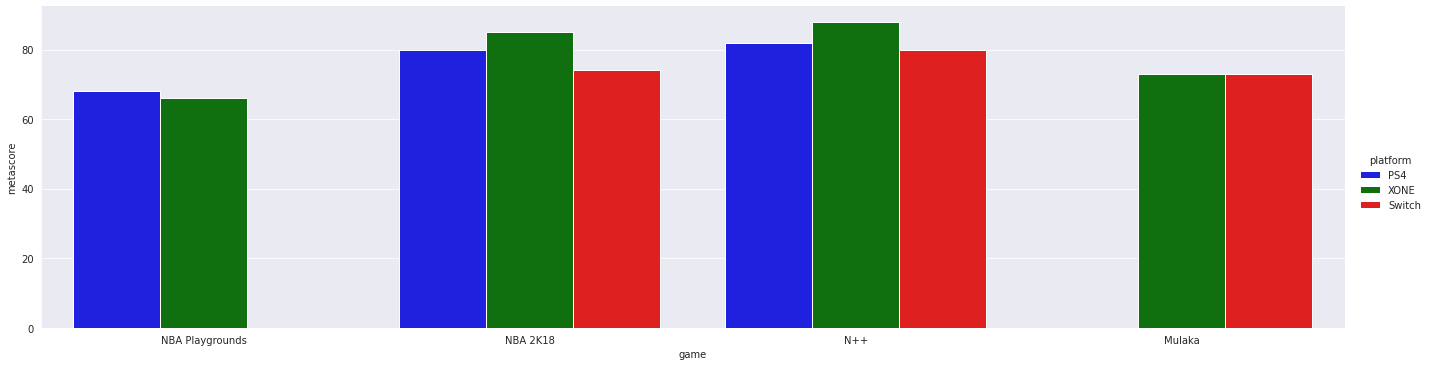

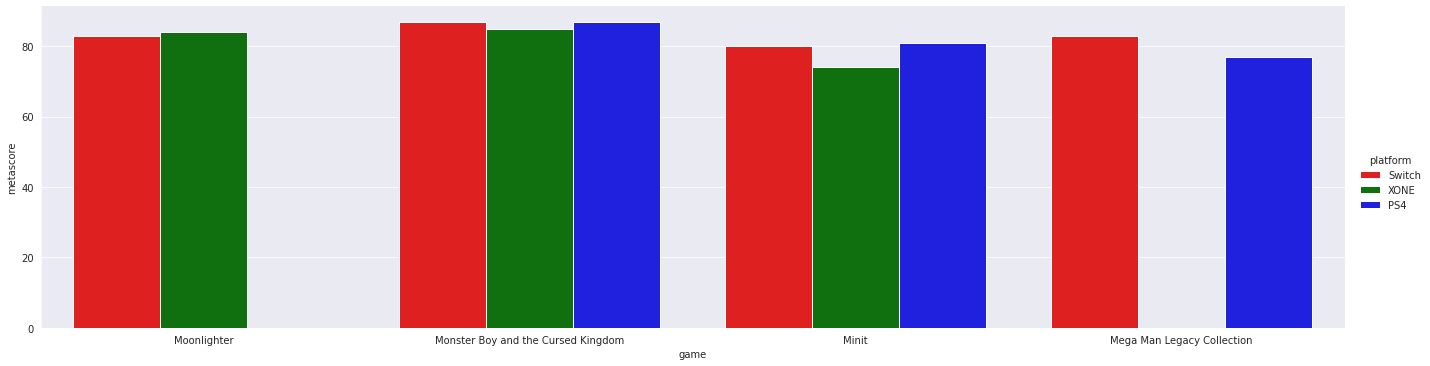

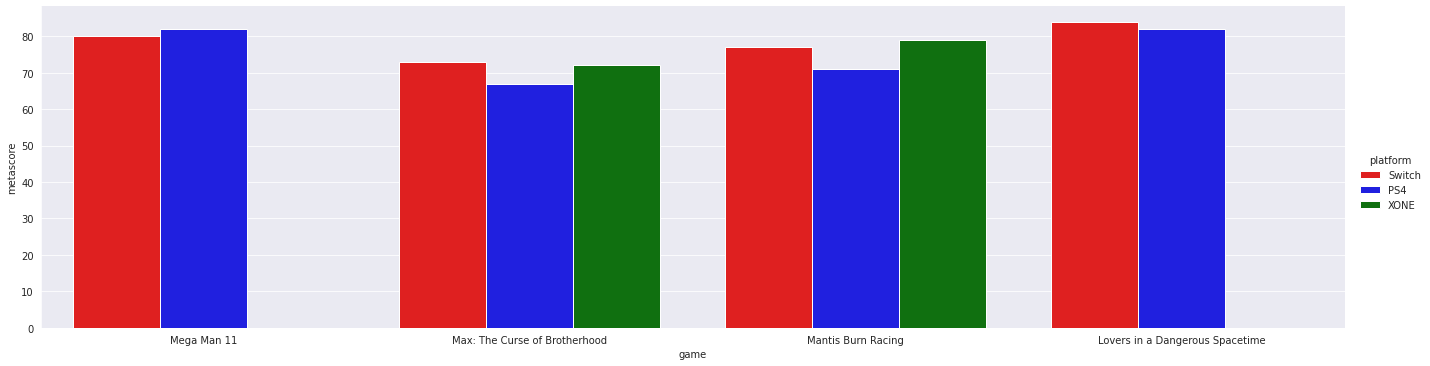

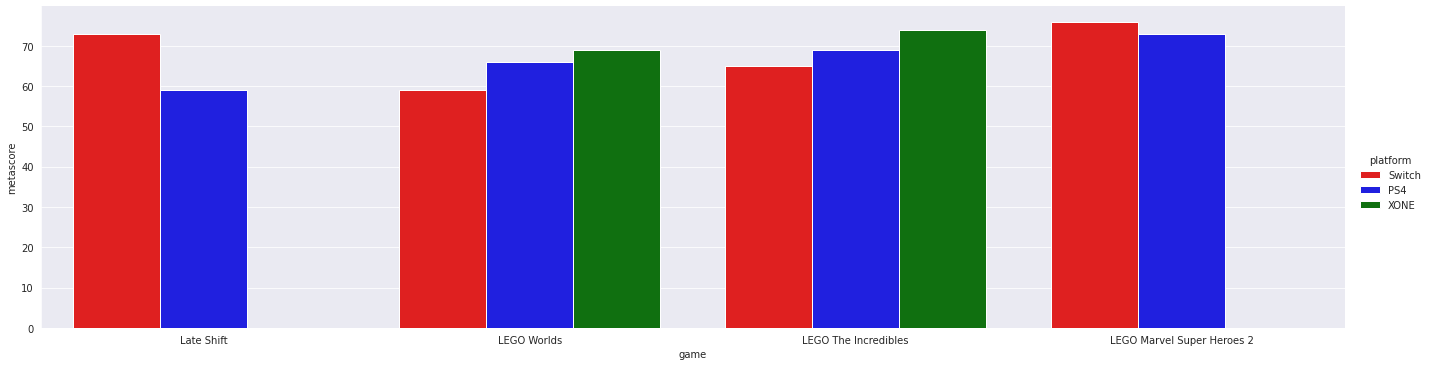

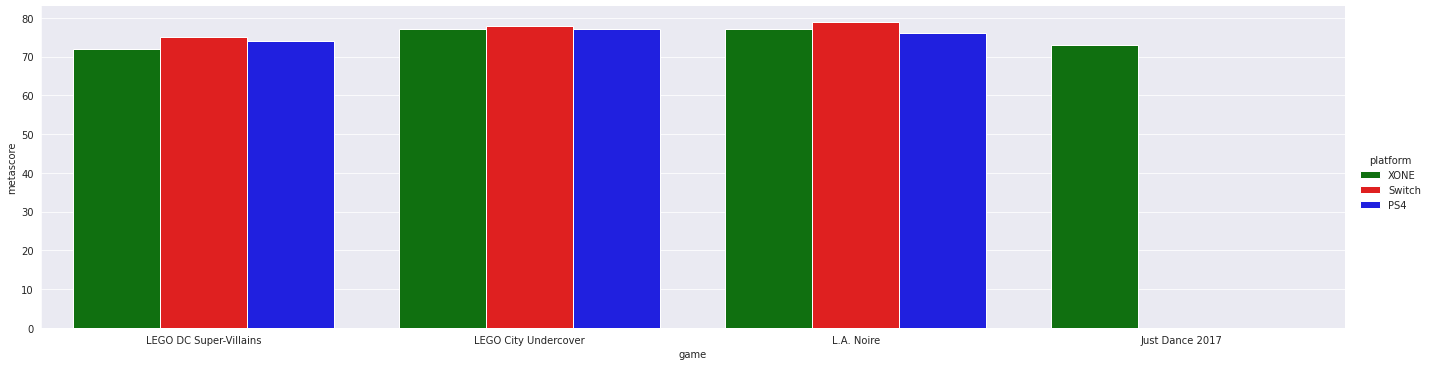

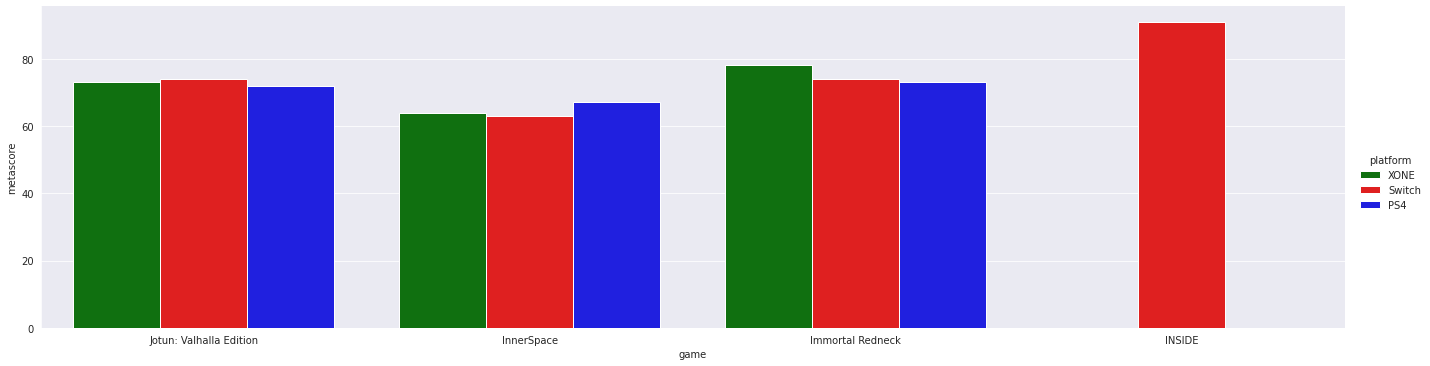

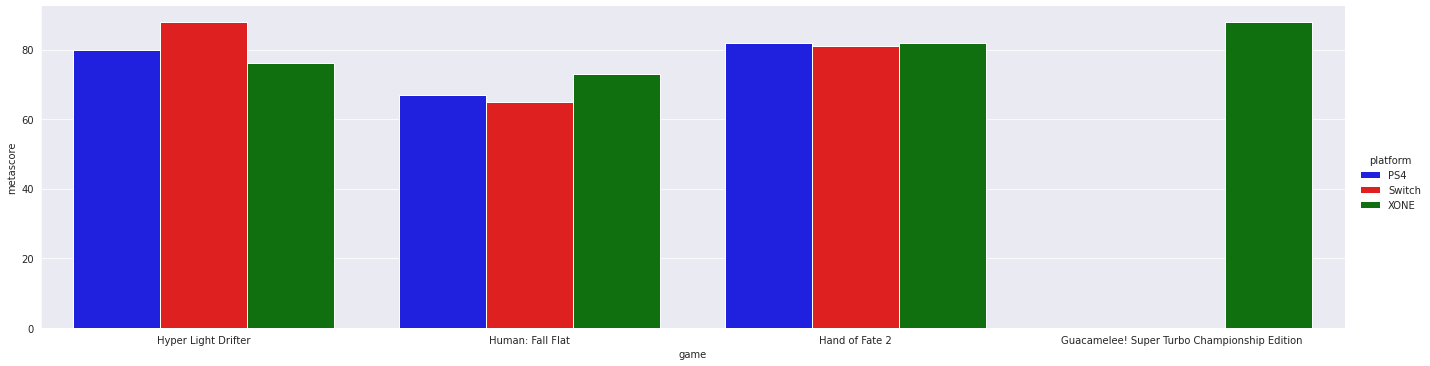

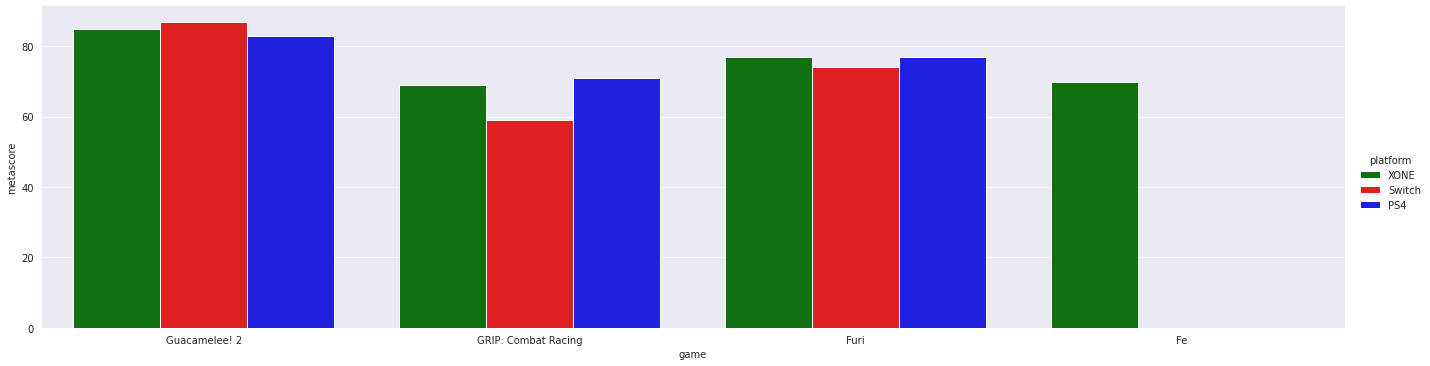

In [134]:
for i in np.linspace(120,249,12):
  sns.catplot(data=game_platform[int(i):int(i)+10], x='game',y='metascore', hue='platform', kind='bar', aspect=30/8, palette=palette)

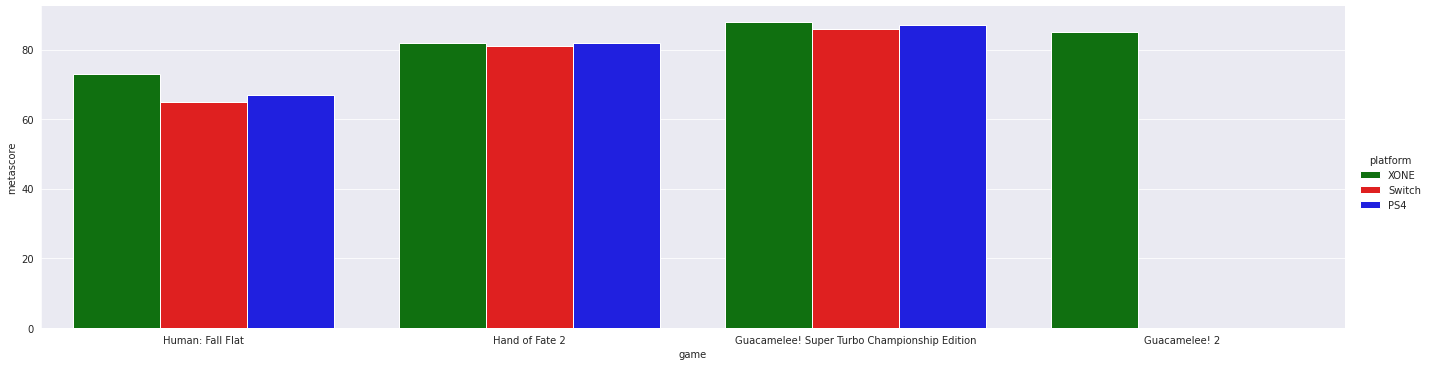

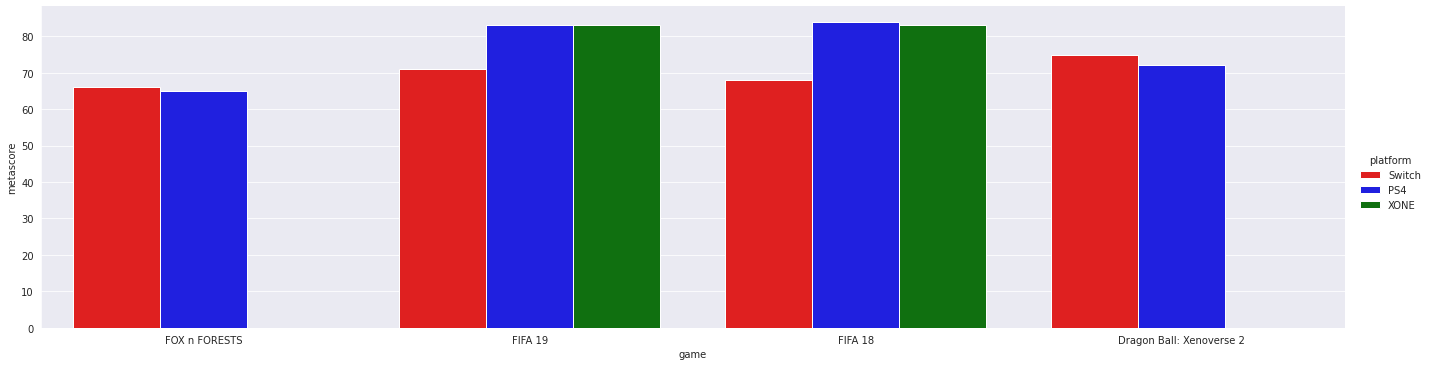

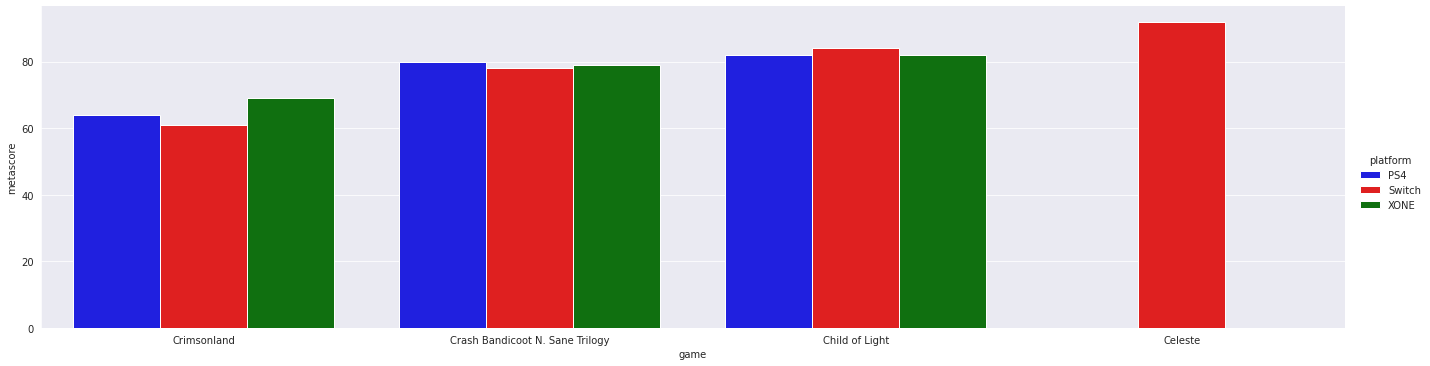

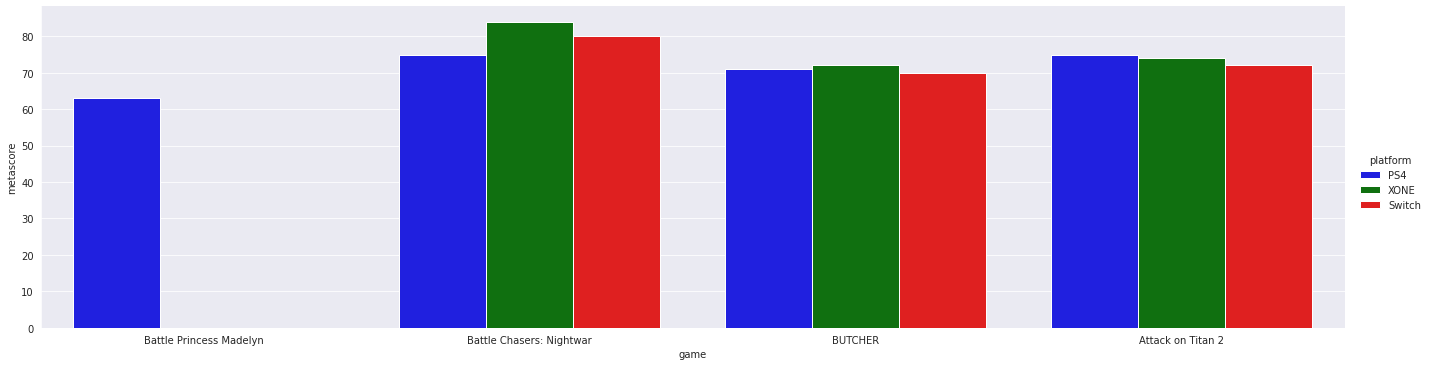

In [135]:
for i in np.linspace(240,308,4):
  sns.catplot(data=game_platform[int(i):int(i)+10], x='game',y='metascore', hue='platform', kind='bar', aspect=30/8, palette=palette)

## Juegos compartidos puntuados por Usuarios.

### Juegos que salieron en al menos 3 compañías: Switch,PS4,XONE
¿Se podrá observar que plataforma es la que más titulos tiene en su catalogo mejor puntuados graficando?

In [136]:
data = pd.read_csv('./metacritic_games.csv')

In [137]:
game_platform = data[data['platform'].apply(lambda x: True if x in ['Switch','PS4','XONE'] else False)]
multi_plat_game = game_platform['game'].value_counts()[game_platform['game'].value_counts() > 2].index
multi_plat_game
game_platform = game_platform[game_platform['game'].apply(lambda x: x in multi_plat_game)]
game_platform = game_platform[['game','platform','user_score']]
game_platform = game_platform.groupby(['game','platform']).first()
game_platform = game_platform.sort_values(by=['game'],ascending=False)
game_platform = game_platform.reset_index()

In [138]:
game_platform

,game,platform,user_score
0,Yooka-Laylee,XONE,57
1,Yooka-Laylee,Switch,76
2,Yooka-Laylee,PS4,62
3,Yoku's Island Express,XONE,78
4,Yoku's Island Express,Switch,84
...,...,...,...
313,BUTCHER,PS4,69
314,BUTCHER,XONE,50
315,Attack on Titan 2,XONE,70
316,Attack on Titan 2,Switch,72


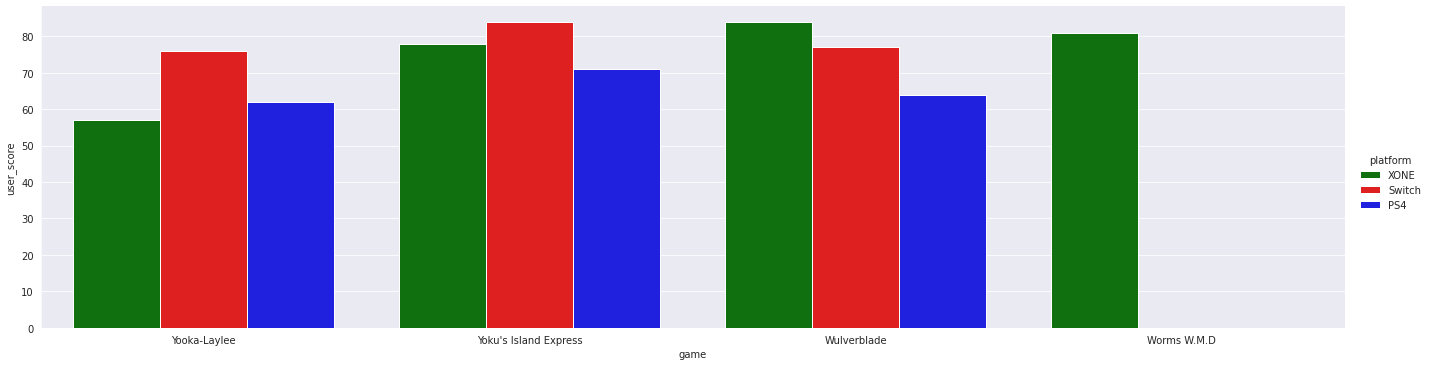

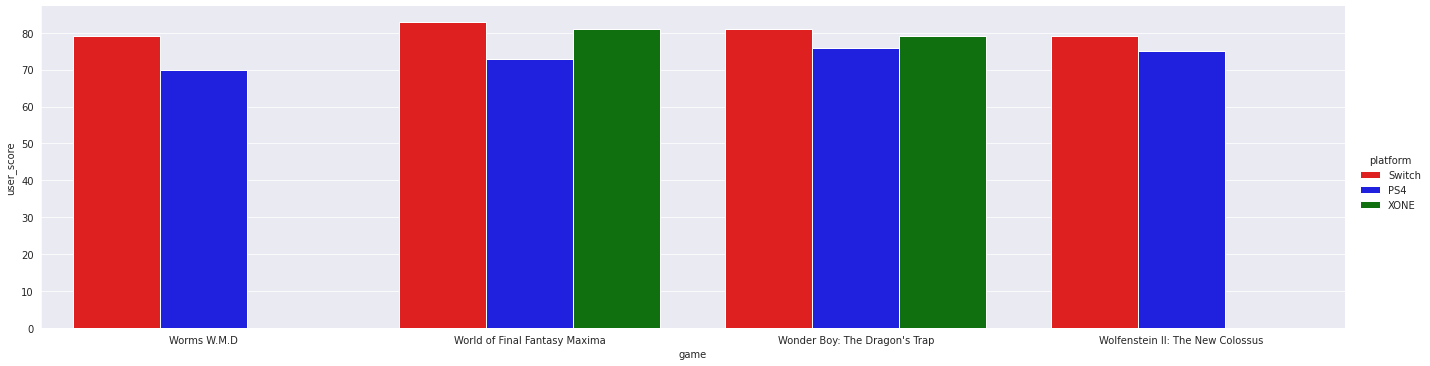

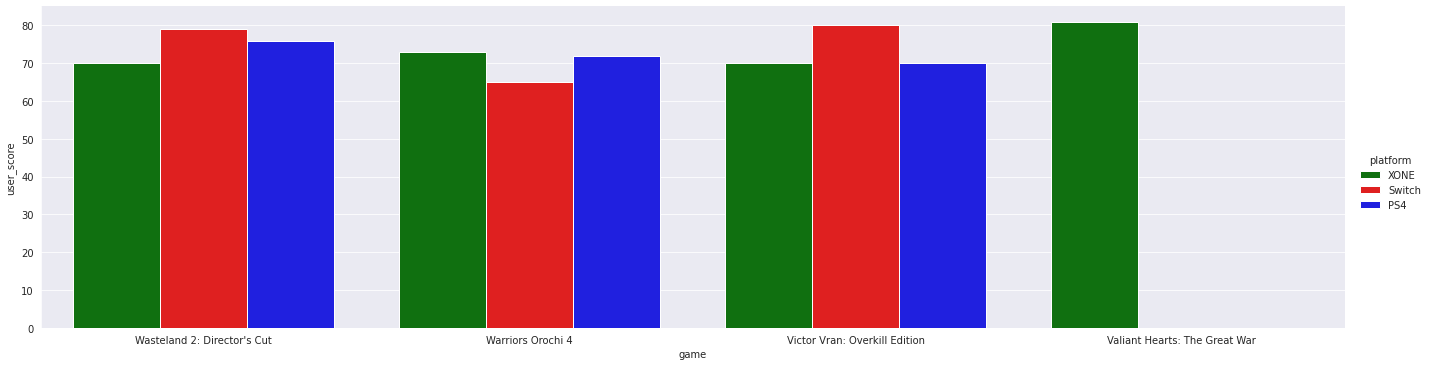

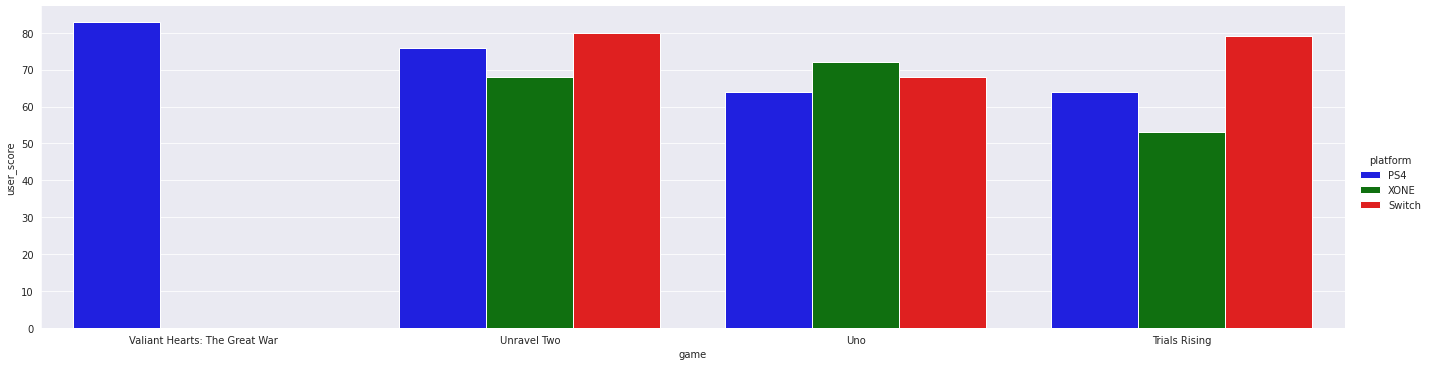

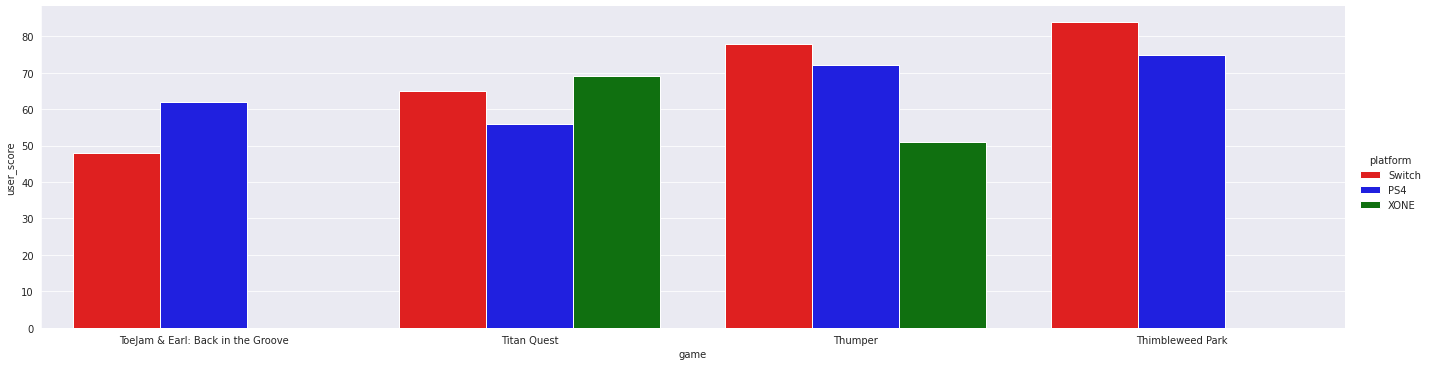

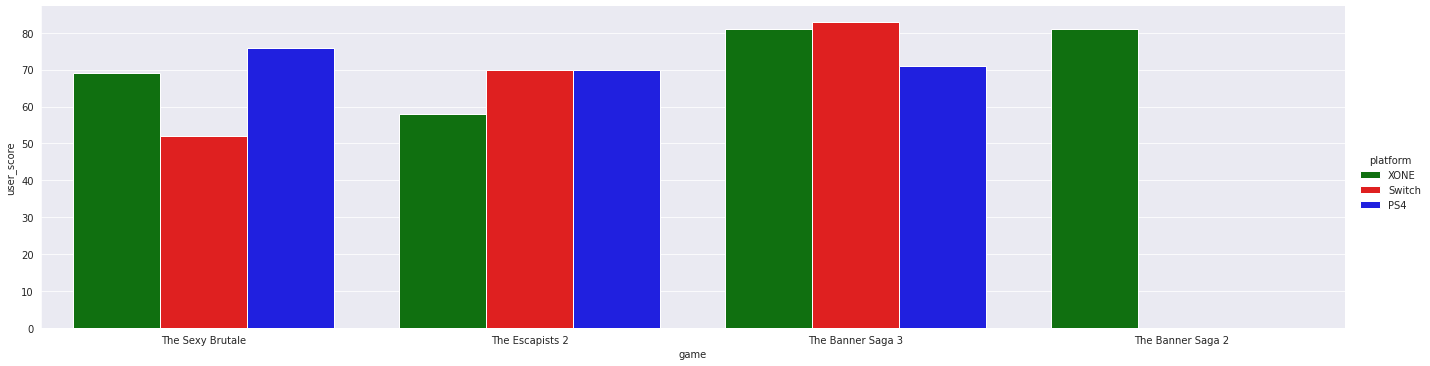

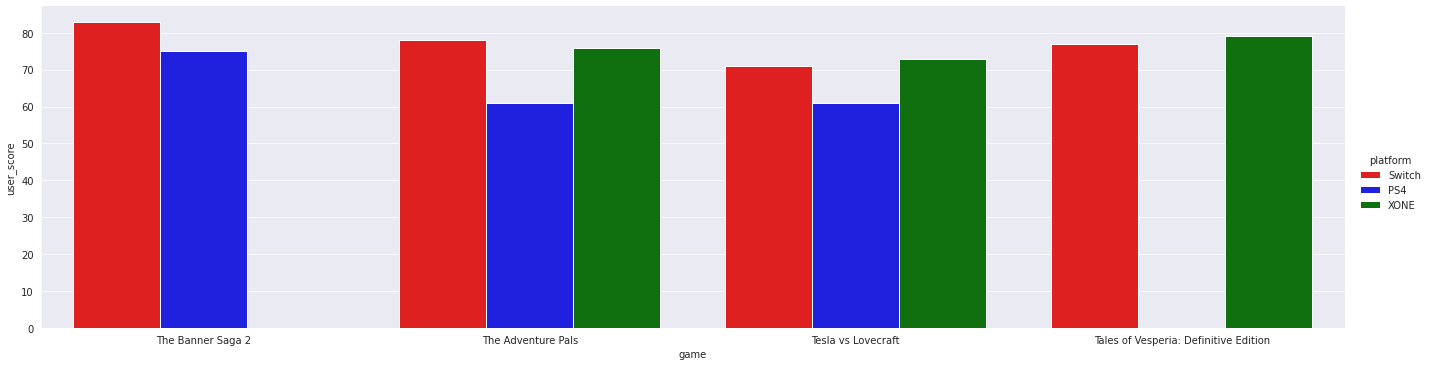

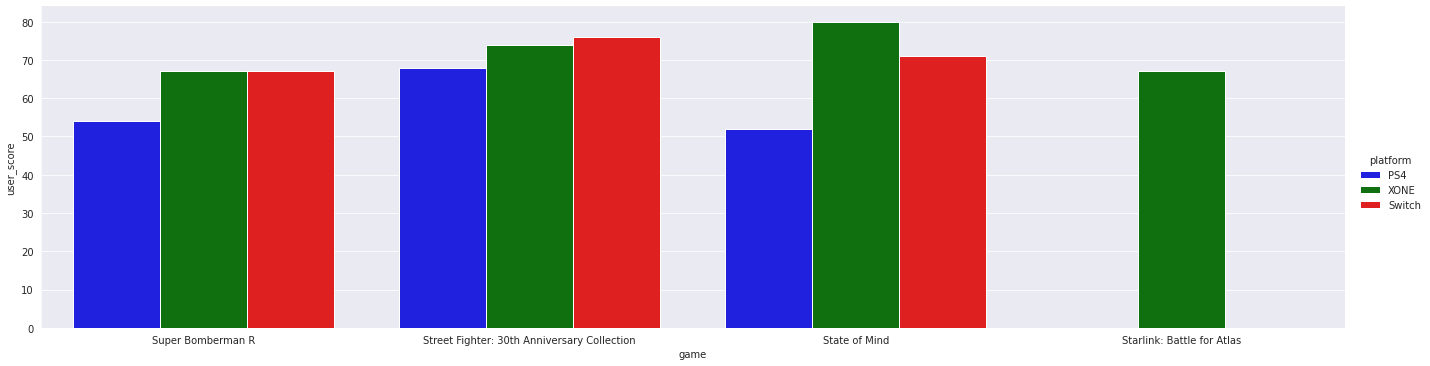

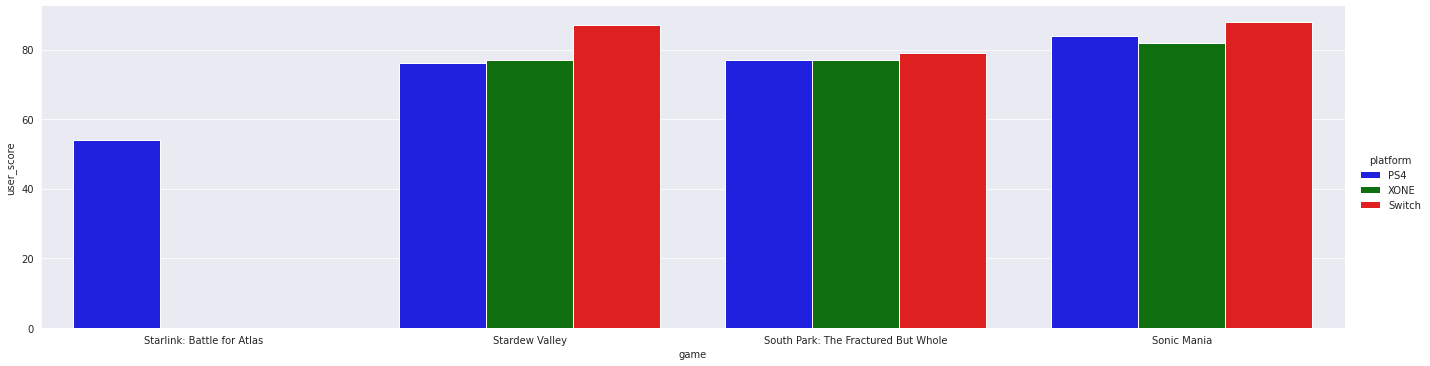

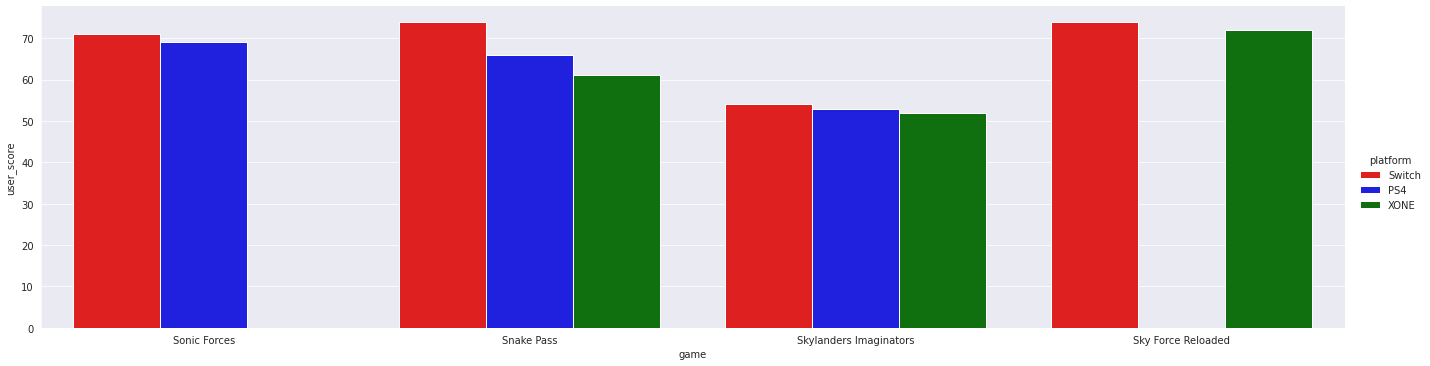

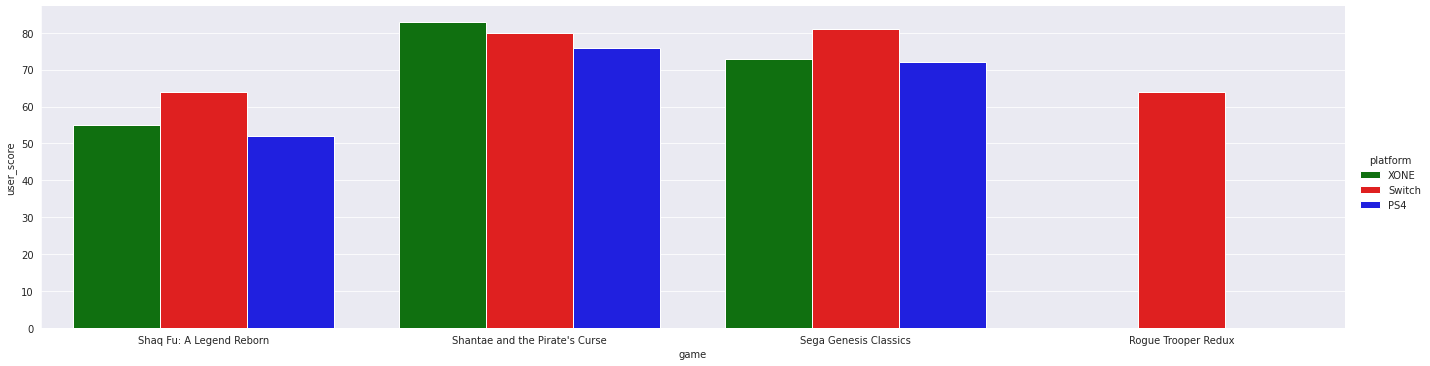

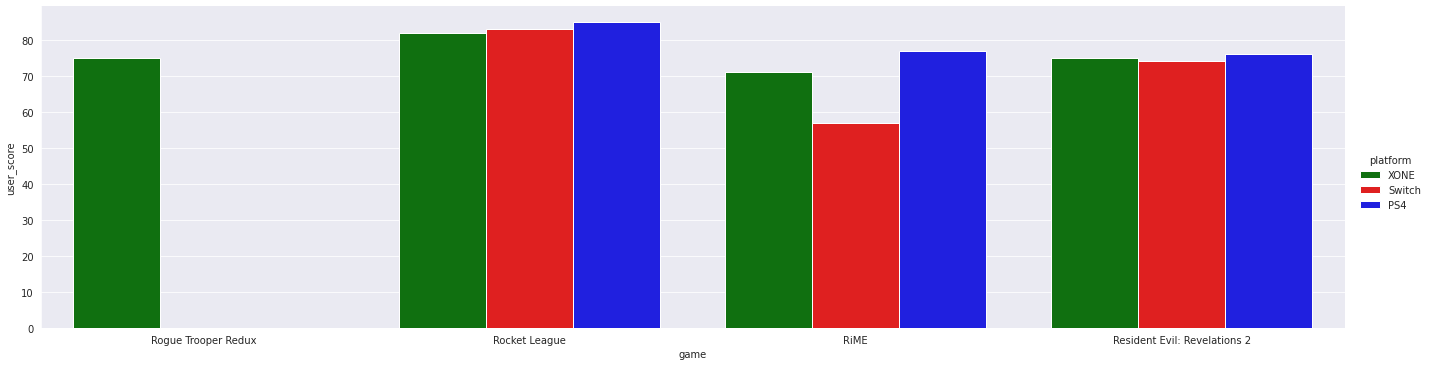

In [140]:
import numpy as np

for i in np.linspace(0,119,12):
  sns.catplot(data=game_platform[int(i):int(i)+10], x='game',y='user_score', hue='platform', kind='bar', aspect=30/8, palette=palette)

## Graficando la relación de los datos.

In [141]:
data = pd.read_csv('./metacritic_games.csv')

In [142]:
data = data[data['platform'].apply(lambda x: True if x in ['Switch','PS4','XONE'] else False)]

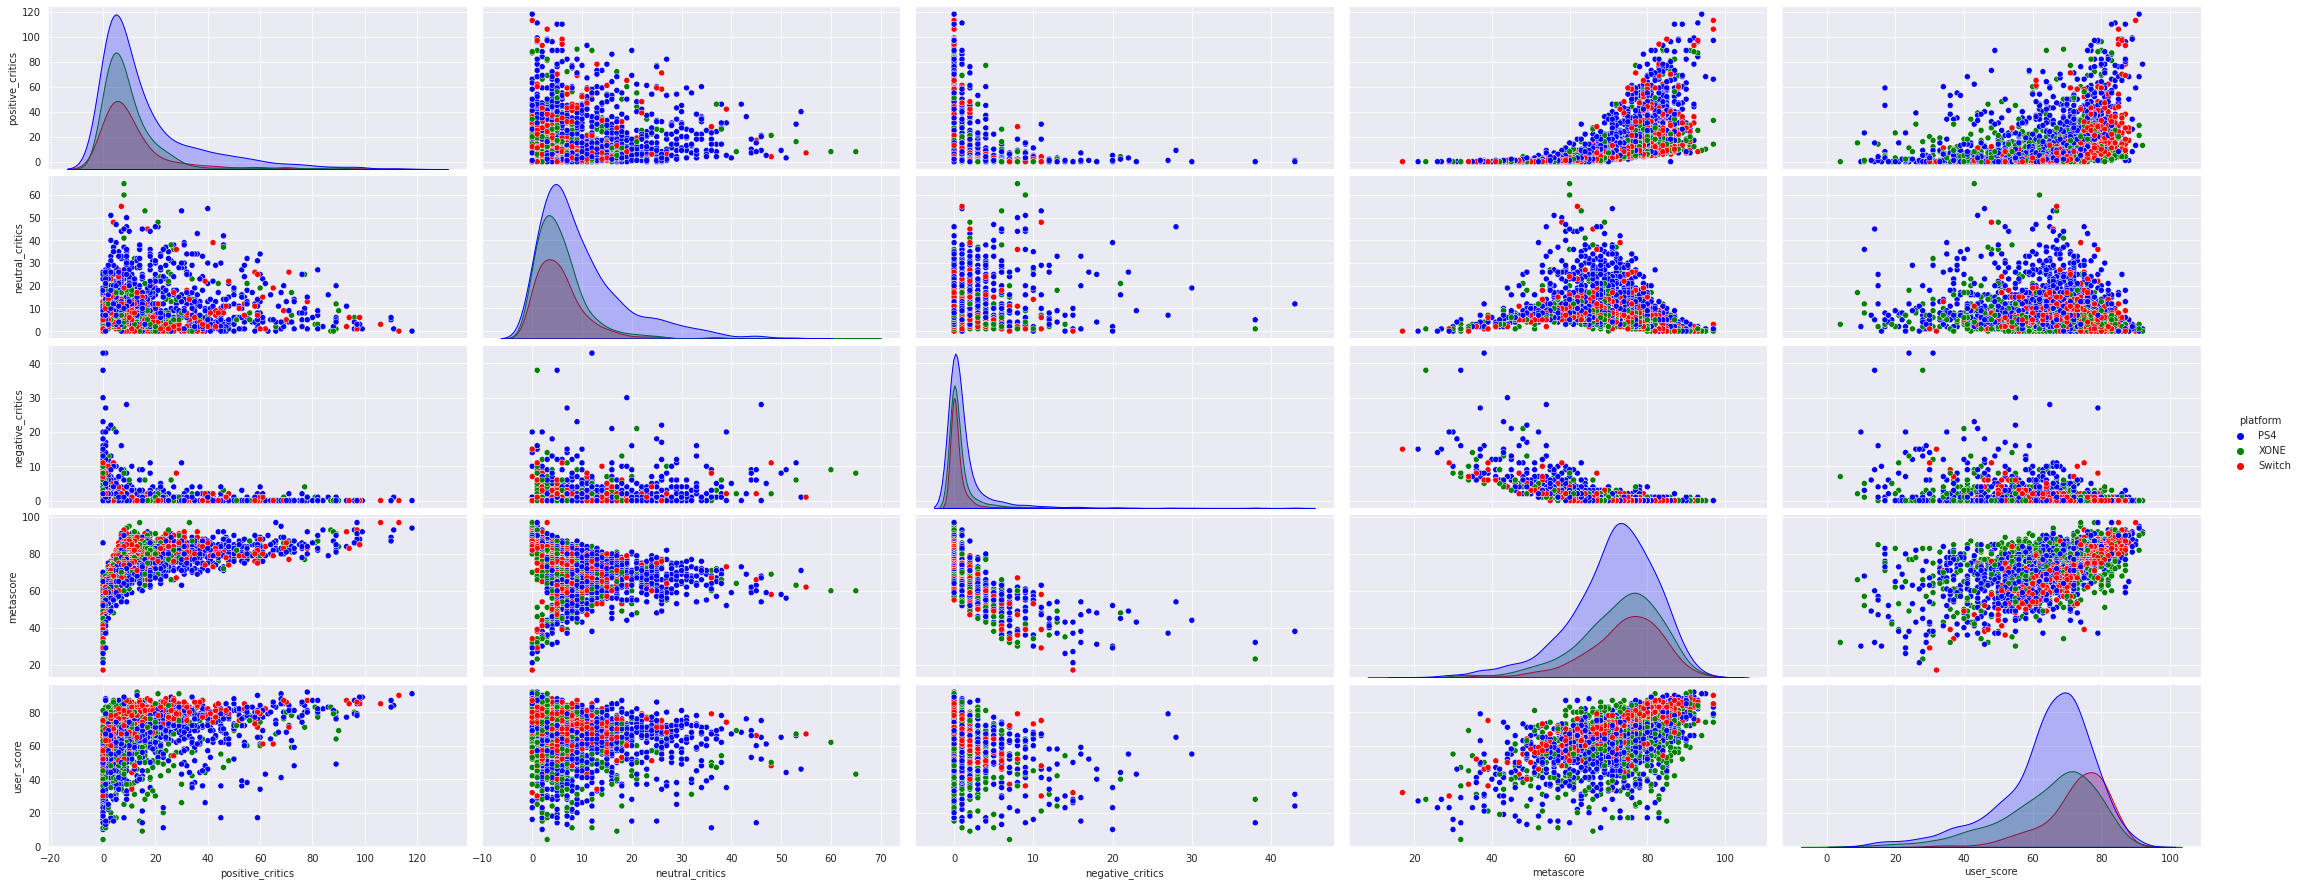

In [143]:
sns.pairplot(data[['platform','positive_critics','neutral_critics','negative_critics','metascore','user_score']], hue='platform', palette=palette, aspect=20/8)

## Información similar

¿Es la prensa una imagen de lo que los usuarios piensan de la industria?

Vamos a probar si la prensa y las puntiaciones de los usuarios estan relacionadas o son similares

H0: puntiación prensa == puntuación usuarios

HA: puntiación prensa =/= puntuación usuarios

Usaremos Chi cuadrado para evaluar la diferencia entre medias.

In [144]:
msc_S = data[data.platform == 'Switch'].metascore.mean()
usr_S = data[data.platform == 'Switch'].user_score.mean()

In [145]:
msc_P4 = data[data.platform == 'PS4'].metascore.mean()
usr_P4 = data[data.platform == 'PS4'].user_score.mean()

In [146]:
msc_X = data[data.platform == 'XONE'].metascore.mean()
usr_X = data[data.platform == 'XONE'].user_score.mean()

Combinamos las medias de los datos en un dataframe para evaluar si podrían estar relacionados

In [147]:
chi2 = pd.DataFrame({'observed': [msc_S,msc_P4,msc_X],'expected' : [usr_S,usr_P4,usr_X]}, index=['Switch','PS4','XBOX'])

In [148]:
from scipy import stats #Librería para hacer pruebas de hipotesis

In [149]:
c2, p, dof, arr = stats.chi2_contingency(chi2)
nl = '\n'

In [150]:
print(f"Chi2 value= {c2}{nl}p-value= {p}{nl}Degrees of freedom= {dof}{nl}Expected Result = {arr}")

Chi2 value= 0.24031609979784996
p-value= 0.8867802701087308
Degrees of freedom= 2
Expected Result = [[76.07202852 70.340519  ]
 [70.31508152 65.01731876]
 [71.14242102 65.78232387]]


El Valor P es de .88 o de 88%. Esto indica que es 88% probable de que H0 sea correcta. 

Nos interesa tener presente que si esta por debajo de .05 o 5%, ya que si esta por debajo de este valor significa que podríamos sospechar que la H0 no satisface los datos y la HA sí.

## Gráfica de Prensa con respecto a compañías

In [153]:
ps4_var = data[data.platform == 'PS4'][['metascore','user_score']]
swithc_var = data[data.platform == 'Switch'][['metascore','user_score']]
xbox_var = data[data.platform == 'XONE'][['metascore','user_score']]
wiiu_var = data[data.platform == 'WIIU'][['metascore','user_score']]

In [154]:
palette = {0: 'BLUE', 1: 'GREEN', 2: 'RED'}

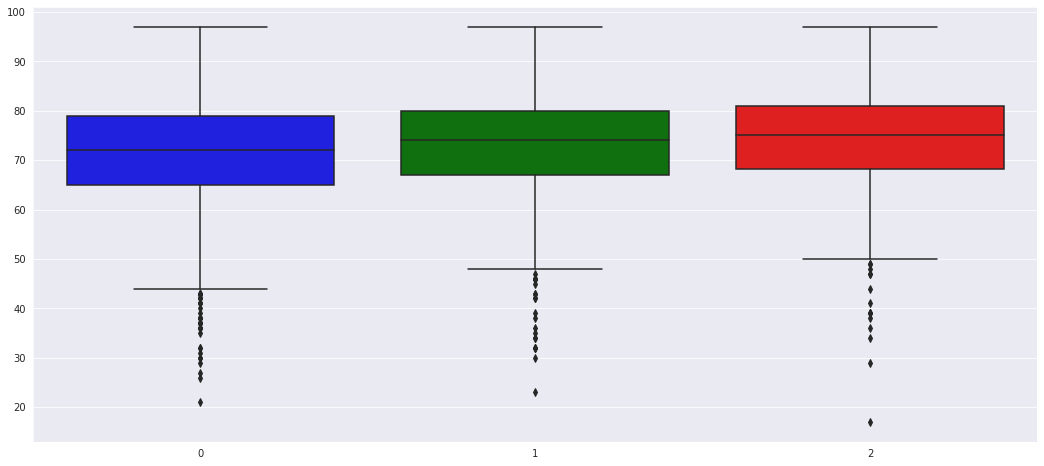

In [37]:
plt.figure(figsize=[18,8])
sns.set_style("darkgrid")
sns.boxplot(data = [ps4_var['metascore'],xbox_var['metascore'], swithc_var['metascore']], palette=palette)

Parece ser que Switch y XONE se relacionan. Comparten rangos similars. Sin embargo Playstation es diferente.

## Gráfica de Puntuaciones de Usuarios con respecto a compañías.

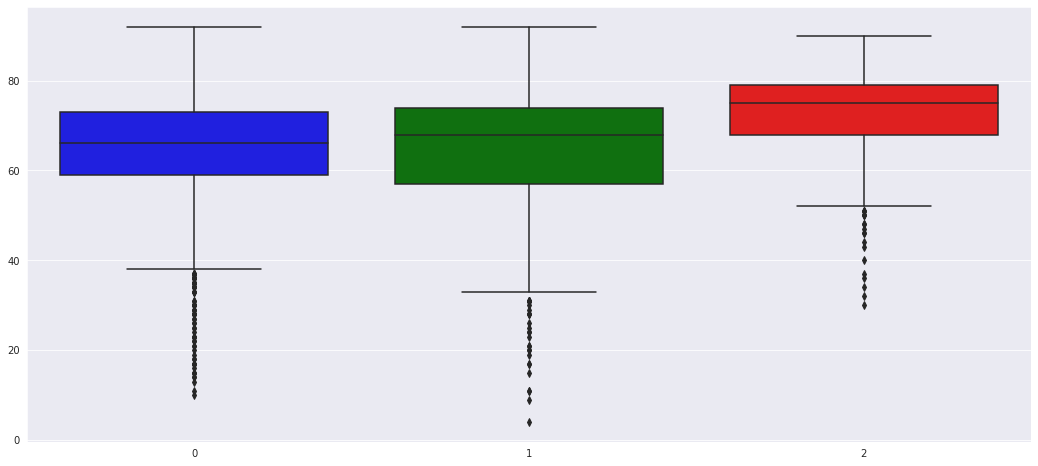

In [111]:
plt.figure(figsize=[18,8])
sns.set_style("darkgrid")
sns.boxplot(data = [ps4_var['user_score'],xbox_var['user_score'], swithc_var['user_score']], palette=palette)

Tanto XBOX como Playstation tienen más amplitud de datos.
Nintendo parece tener un trato especial por parte de los usuarios.

## Diferencias y relaciones entre Público de PS4 y Prensa:

### H0: Calificación Prensa == Calificación Usuarios
### HA: Calificación Prensa =/= Calificación Usuarios

In [108]:
F,p = stats.f_oneway(ps4_var['metascore'],ps4_var['user_score'])
print(f'F-score: {F}, p-value: {p}')

F-score: 223.17208811288273, p-value: 1.2050744184861254e-48


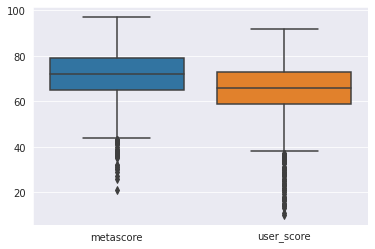

In [106]:
sns.boxplot(data = ps4_var)

Parece que hay grandes diferencias de lo que piensan los usuarios de play a lo que dice la prensa realmente. En este caso son más bajas las notas que dan los usuarios a lo que realmente la prensa dice ser.

## Diferencias y relaciones entre Público de Switch y Prensa:

### H0: Calificación Prensa == Calificación Usuarios
### HA: Calificación Prensa =/= Calificación Usuarios

In [107]:
F,p = stats.f_oneway(swithc_var['metascore'],swithc_var['user_score'])
print(f'F-score: {F}, p-value: {p}')

F-score: 2.616732903648962, p-value: 0.10604229989059531


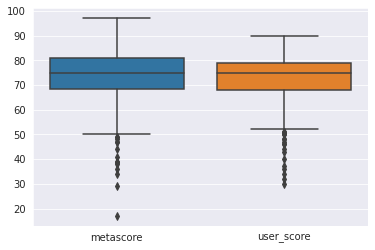

In [159]:
sns.boxplot(data = swithc_var)

Con Switch es el caso contrario a Playstation. Estos comparten similitud, solo que los valores más extremos positivos no son puntuados por los usuarios y la prensa sí.

## Diferencias y relaciones entre Público de XONE y Prensa:

### H0: Calificación Prensa == Calificación Usuarios
### HA: Calificación Prensa =/= Calificación Usuarios

In [109]:
F,p = stats.f_oneway(xbox_var['metascore'],xbox_var['user_score'])
print(f'F-score: {F}, p-value: {p}')

F-score: 166.1701235257701, p-value: 3.284521622933438e-36


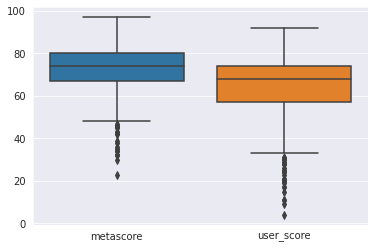

In [160]:
sns.boxplot(data= xbox_var)

Es el mismo caso que PS4. Los usuarios tienden a ver peor de lo que la prensa ve a XONE.

## Prueba de Varianza.

### H0: Las compañías varian de igual medida entre ellas. 

Switch = XONE = PS4

### HA: Las compañías varian diferente
Switch ≠ XONE ≠ PS4

In [48]:
F,p = stats.f_oneway(xbox_var['metascore'],swithc_var['metascore'])
print(f'F-score: {F}, p-value: {p}')

F-score: 3.0756516432462715, p-value: 0.07970693408287087


In [49]:
F,p = stats.f_oneway(xbox_var['metascore'],ps4_var['metascore'])
print(f'F-score: {F}, p-value: {p}')

F-score: 8.711307247864388, p-value: 0.0031957015012337004


In [50]:
F,p = stats.f_oneway(ps4_var['metascore'],swithc_var['metascore'])
print(f'F-score: {F}, p-value: {p}')

F-score: 20.155928277505357, p-value: 7.554222030822733e-06


Existe una relación entre como varian los juegos tanto buenos como malos de Switch y XONE por parte de la prensa.

Si hablamos de PS4, esta se vé muy diferente tanto por parte de XONE como de Switch. Esta estando más distante de Switch que XONE.

## Porcentaje de Juegos Buenos y Porcentaje de Juegos Malos en cada plataforma por total de juegos

Nos interesa saber cual es el rango de puntuaciones para el decil más alto y bajo. 

En este caso probamos saber el 10% más bajo y el 10% más alto e intentamos saber que compañía tiene más juegos en estos rangos con respecto a su catálogo.

### Mejores

In [70]:
most_valuated = data[['game','platform','metascore']].sort_values(by='metascore', ascending=False)
most_valuated.quantile([.9,1])

,metascore
0.9,85.0
1.0,97.0


In [88]:
most_valuated[most_valuated['metascore'].apply(lambda x: x > 85)]['platform'].value_counts()

PS4       95
XONE      74
Switch    45
Name: platform, dtype: int64

In [99]:
total_best_play = 95 / len(data[data['platform'] == 'PS4']) 
total_best_xone = 74 / len(data[data['platform'] == 'XONE'])
total_best_switch = 45 / len(data[data['platform'] == 'Switch'])

In [103]:
print(f'PS4: {total_best_play *100:.2f}%\nXONE: {total_best_xone*100:.2f}%\nSwitch: {total_best_switch*100:.2f}%')

PS4: 6.65%
XONE: 9.44%
Switch: 8.56%


Para los juegos mejor puntuados tenemos el siguiente orden para los juegos de catálogo en el 10% mejor puntuado.



1.   XONE con 9.44% 
2.   Switch con 8.56%
3.   PS4 con 6.65



### Peores

In [86]:
worst_valuated = data[['game','platform','metascore']].sort_values(by='metascore', ascending=True)
worst_valuated.quantile([0,.1])

,metascore
0.0,17.0
0.1,58.0


In [89]:
worst_valuated[worst_valuated['metascore'].apply(lambda x: x < 58)]['platform'].value_counts()

PS4       160
XONE       75
Switch     35
Name: platform, dtype: int64

In [100]:
total_worst_play = 160 / len(data[data['platform'] == 'PS4'])
total_worst_xone = 75 / len(data[data['platform'] == 'XONE'])
total_worst_switch = 35 / len(data[data['platform'] == 'Switch'])

In [104]:
print(f'PS4: {total_worst_play*100:.2f}%\nXONE: {total_worst_xone*100:.2f}%\nSwitch: {total_worst_switch*100:.2f}%')

PS4: 11.20%
XONE: 9.57%
Switch: 6.65%


Para los juegos peor puntuados tenemos el siguiente orden para los juegos de catálogo en el 10% mejor puntuado.

(Mientras menor sea el dato, mejor catálogo tienen)


1.   Switch con 6.65% 
2.   XONE con 9.57%
3.   PS4 con 11.20%



## Conclusiones Finales:


### XONE:
Es la que más juegos de su catálogo estan en el 10% mejor puntuado por la prensa y la segunda más separada de lo que se observa con la preferencia de los usuarios y lo que la prensa observa.

La calidad de sus juegos considerados por la prensa se asemejan más a los de Switch. Las pruebas indican que su rendimiento es igual de favorable, a pesar de no ser la opción preferida por el público.


### Switch:
Es la empresa que más apegada esta a lo que ve la prensa y lo que ven los usuarios. 

Es la que más se asemeja a la variación de XBOX. No son tán diferentes.

Es la compañía con menos juegos y la que menos juegos tiene en su catálogo en el 10% peor puntuado por la prensa.

Se podría pensar que es favorecida por la prensa por poner juegos con mayor puntiación que los usuarios. Sin embargo, las pruebas muestran que hay más similitud entre lo que sienten los usuarios y lo que la prensa observa.



#### PS4: 
A pesar de tener a PS4 como una compañía con muchos juegos, tiene mayoría en el 10% de los peores puntuados.

Es el que más alejado esta entre lo que dice la prensa y lo que los usuarios perciben.

Es el que está más disperso de las tres compañías, no comparte ni la misma variación. Hay datos suficientes para poder asumir que podría haber sido favorecida por la prensa durante la época del 2011 y 2019.